# Analyses des accidents d'avion (1962-2023)

## Contexte métier

Dans le cadre de sa stratégie de diversification, notre entreprise envisage d’entrer dans le secteur de l’aviation commerciale et privée. Elle souhaite acquérir une flotte d’avions afin de proposer des services de transport aérien. Toutefois, avant de lancer cette nouvelle activité, une étude des risques liés à l’exploitation aérienne est nécessaire.

En particulier, la direction souhaite identifier **les modèles d’avions les plus sûrs**, sur la base d’un historique fiable d’incidents et d’accidents. Nous avons été mandaté pour mener cette analyse en utilisant un ensemble de données fourni par le **National Transportation Safety Board (NTSB)**, couvrant les accidents d’aviation civile entre **1962 et 2023**.

Notre rôle est de :
- Nettoyer et préparer les données ;
- Identifier les types d’aéronefs les plus impliqués dans des accidents ;
- Mettre en évidence les causes récurrentes d’accidents ;
- Visualiser les données de manière claire et interactive ;
- Fournir des **recommandations exploitables** à la division aéronautique pour orienter ses **choix d’acquisition**.

Cette analyse permettra à l’entreprise de limiter les risques humains, financiers et opérationnels associés à cette nouvelle activité, tout en assurant un **niveau de sécurité optimal** pour ses futurs clients.


### Importation des librairies et une petite configuration de base pour l'affichage des graphes

In [56]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de base pour les graphiques
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

### Chargement des données

In [57]:
df = pd.read_csv('AviationData.csv', encoding='latin1')
df_uss_codes = pd.read_csv('USState_Codes.csv')

C:\Users\macke\AppData\Local\Temp\ipykernel_12636\3613692280.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='latin1')


### Fusionner les deux dataframes
Dans ce processus la colonne `Location` du dataframe principale sera spliter pour donner deux nouvelles colonnes `Abbreviation` et `US_State`, de plus pour les location qui se trouvent en dehors des US seront remplies par **Outside US**

In [58]:
# Etape 1 : extraire l'abréviation dpuis la colonne 'Location'
df['State_Abbrev'] = df['Location'].str.extract(r",\s*([A-Z]{2})$")

# Etape 2 : Melanger pour récupérer le nom complet de l'Etat
df = df.merge(df_uss_codes, how='left', left_on='State_Abbrev', right_on='Abbreviation')

# Etape 3 : remplacer les valeurs nulles par "Outside US"
df['US_State'] = df['US_State'].fillna('Outside US')

# Etape 4 : Supprimer la colonne State_Abbrev pour eviter le redondance des données
df = df.drop('State_Abbrev', axis=1)

### Exploration initiale

In [59]:
df.describe(include="all")

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,US_State,Abbreviation
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82505,75118,88889,82162
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,...,NaN,NaN,NaN,NaN,4,12,17074,2924,58,57
top,20001214X45071,Accident,ERA22LA103,2000-07-08,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,25-09-2020,California,CA
freq,3,85015,2,25,434,82248,19,24,1488,240,...,NaN,NaN,NaN,NaN,77303,15428,61754,17019,8857,8857
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Netoyage des données

Dans ce processus un nouveau dataframe sera crée appelé `df_clean` qui aura pour but comme sont nom l'indique de contenir les données exploitable pour notre analyse.

Suppression des colonnes `Schedule`, `Air.carrier`, `FAR.Description`, `Aircraft.Category`, `Airport.Code`, `Airport.Name`, `Publication.Date`, `Report.Status`, `Injury.Severity` et `Registration.Number`, car elles contiennent un nombre important de valeurs manquantes et/ou n'apportent pas d'informations pertinentes pour notre analyse.

In [60]:
# Création du dataframe df_clean
df_clean = df.copy()

df_clean.drop(["Schedule", "Air.carrier", "FAR.Description", "Aircraft.Category", "Airport.Code", "Airport.Name", "Publication.Date", "Report.Status", "Registration.Number", "Injury.Severity"], axis=1, inplace=True)

In [61]:
df_clean.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Aircraft.damage,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,US_State,Abbreviation
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Destroyed,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Idaho,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Destroyed,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,California,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Destroyed,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Virginia,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Destroyed,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,California,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Destroyed,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Ohio,OH


#### Gestion des valeurs manquantes

In [64]:
# Remplisage des valeur manquantes de la colonne "Broad.phase.of.flight" par Unknown, de facon a eviter de perdre des données mais en s'assurant par la d'ignorer les Unknown afin de ne pas forcer les resultats
df_clean['Broad.phase.of.flight'] = df_clean['Broad.phase.of.flight'].fillna('Unknown')

# Remplisage des valeurs manquantes de la colonne "Engine.Type" par Unknown
df_clean['Engine.Type'] = df_clean['Engine.Type'].replace(['LR', 'NONE', 'UNK'], 'Unknown')
df_clean['Engine.Type'] = df_clean['Engine.Type'].fillna('Unknown')

#impoutation des valeurs manquantes de la colonne "Number.of.Engines" par la médiane, étant donné que la distribution est asymétrique
df_clean['Number.of.Engines'] = df_clean['Number.of.Engines'].fillna(df_clean['Number.of.Engines'].median())

# Impoutation des valeurs manquantes des colonnes suivantes par 0 qui est aussi la medianne, cette decision est prise en supposant que les valeurs manquantes de ces colonnes sont du au fait qu'on n'a pas recenccé de tel cas
df_clean[['Total.Minor.Injuries', 'Total.Fatal.Injuries', 'Total.Uninjured', 'Total.Serious.Injuries']] = df_clean[[
    'Total.Minor.Injuries', 'Total.Fatal.Injuries', 'Total.Uninjured', 'Total.Serious.Injuries'
]].fillna(0)

df_clean = df_clean.dropna(subset=['Make', 'Model', 'Amateur.Built'])

df_clean[['Weather.Condition', 'Purpose.of.flight', 'Aircraft.damage']] = df_clean[[
    'Weather.Condition', 'Purpose.of.flight', 'Aircraft.damage'
]].fillna('Unknown')

In [65]:
df_clean.shape

(88678, 23)

In [ ]:
df_clean.isna().sum()[lambda x: x > 0].sort_values(ascending=False)

Longitude       54370
Latitude        54361
Abbreviation     6586
Country           225
Location           48
dtype: int64

### Analyse des facteurs de risques

**Objectif** : L'objectif ici c'est d'indentifier les types d'avions et des moteurs qui presente le mins de risque.

Ca va passer par 6 etapes principales:
- Une analyse par type de moteurs (`Engine.Type`)
- Une analyse par avion (`make` + `model`)
- Une analyse par nombre de moteurs (`Number.of.Engines`)
- Une analyse par condition météo (`Weather.Condition`)
- Une analyse par phase de vol (`Broad.phase.of.flight`)
- Une analyse par localisation (`US_State` + `Latitude/Longitude`)

#### Analyse par type de moteurs

**Objectif** : Déterminer le type de moteur presentant le moins de risque, en determinant `la frequence d'accidents`, `le Taux d'accident mortels` et `la gravité moyenne des accidents` par types de moteurs

In [11]:
# Fréquence d'accidents par type de moteurs (valeurs absolues)
frequency_engine_type = df_clean[df_clean['Engine.Type'] != 'Unknown']['Engine.Type'].value_counts().sort_values(ascending=False)

# Fréquence en pourcentage
percentage_engine_type = frequency_engine_type / frequency_engine_type.sum() * 100

# Affichage combiné
tableau_recapitulatif = pd.DataFrame({
    'Nombre d\'accidents': frequency_engine_type,
    'Pourcentage (%)': percentage_engine_type.round(4)
})

tableau_recapitulatif

,Nombre d'accidents,Pourcentage (%)
Engine.Type,,
Reciprocating,69530,87.1992
Turbo Shaft,3609,4.5261
Turbo Prop,3391,4.2527
Turbo Fan,2481,3.1115
Turbo Jet,703,0.8816
Geared Turbofan,12,0.0150
Electric,10,0.0125
Hybrid Rocket,1,0.0013


Text(0, 0.5, "Nombre d'accidents")

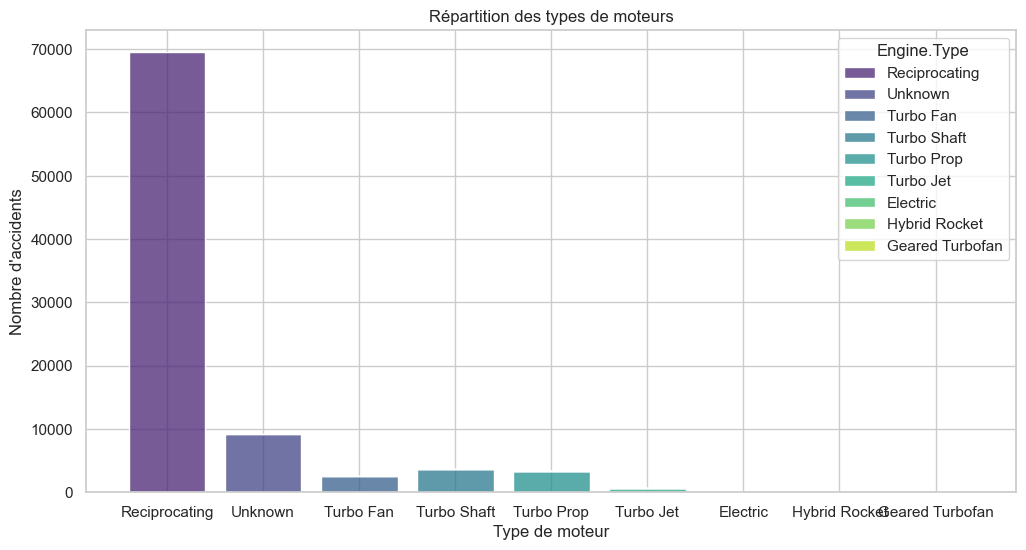

In [12]:
# Visualisation de la répartition des types de moteurs
sns.histplot(data=df_clean, x='Engine.Type', palette='viridis', hue='Engine.Type', multiple='stack', shrink=0.8, discrete=True)
plt.title('Répartition des types de moteurs')
plt.xlabel('Type de moteur')
plt.ylabel("Nombre d'accidents")

In [13]:
# Calcul du taux d'accidents mortels par type de moteur
mortality_rate_by_engine = df_clean[df_clean['Engine.Type'] != 'Unknown'].groupby('Engine.Type')['Total.Fatal.Injuries'].mean() * 100
mortality_rate_by_engine

Engine.Type
Electric            20.000000
Geared Turbofan      0.000000
Hybrid Rocket      100.000000
Reciprocating       38.858026
Turbo Fan          228.686058
Turbo Jet          146.101695
Turbo Prop          89.477352
Turbo Shaft         55.756579
Name: Total.Fatal.Injuries, dtype: float64

Text(0.5, 1.0, "Nombre d'accidents moterl par type de moteur")

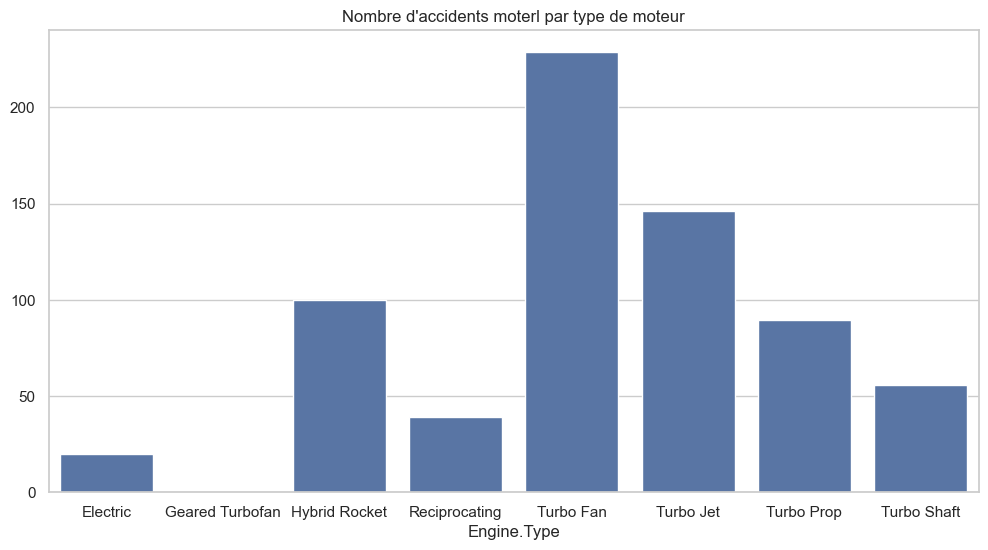

In [14]:
sns.barplot(x=mortality_rate_by_engine.index, y=mortality_rate_by_engine.values)
plt.title('Nombre d\'accidents moterl par type de moteur')

In [15]:
# Calcul de la gavité moyenne des accidents par type de moteur
severity_by_engine = df_clean[(df_clean['Engine.Type'] != 'Unknown') & (df_clean['Total.Fatal.Injuries'])].groupby('Engine.Type')['Total.Serious.Injuries'].mean()
severity_by_engine

Engine.Type
Electric         0.000000
Hybrid Rocket    0.000000
Reciprocating    0.165650
Turbo Fan        5.314815
Turbo Jet        0.444444
Turbo Prop       0.321317
Turbo Shaft      0.392857
Name: Total.Serious.Injuries, dtype: float64